In [1]:
import pandas as pd
import numpy as np
from lightfm.data import Dataset
import ast
import matplotlib.pyplot as plt
%matplotlib inline
from lightfm import LightFM
from lightfm.evaluation import precision_at_k,auc_score,reciprocal_rank
import scipy
import time
import math
from lightfm.data import Dataset
import warnings
warnings.filterwarnings("ignore")

# https://github.com/lyst/lightfm
# https://lyst.github.io/lightfm/docs/lightfm.evaluation.html

/Users/Fei/anaconda3/lib/python3.7/site-packages/lightfm/_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn('LightFM was compiled without OpenMP support. '


In [2]:
merged_df = pd.read_csv('merged_df.csv')
merged_df

,title,url,genre,desc,tf-idf,reviews,stars,user,user_id,podcast_id
0,The Shrink Next Door,https://chartable.com/podcasts/the-shrink-next...,"['Business', 'Society & Culture']",Veteran journalist Joe Nocera’s neighbor...,"bloomberg, celebrities, company, control, coun...",“Whilst there is a story here it doesn’t seem ...,3,whatdidiexpect,9436,172
1,The Shrink Next Door,https://chartable.com/podcasts/the-shrink-next...,"['Business', 'Society & Culture']",Veteran journalist Joe Nocera’s neighbor...,"bloomberg, celebrities, company, control, coun...","“I can’t stop listening... both fascinated, ye...",4,Ardentspirit,584,172
2,The Shrink Next Door,https://chartable.com/podcasts/the-shrink-next...,"['Business', 'Society & Culture']",Veteran journalist Joe Nocera’s neighbor...,"bloomberg, celebrities, company, control, coun...",“I half expected John B McElmore to wander out...,5,emaywwew,7295,172
3,The Shrink Next Door,https://chartable.com/podcasts/the-shrink-next...,"['Business', 'Society & Culture']",Veteran journalist Joe Nocera’s neighbor...,"bloomberg, celebrities, company, control, coun...",“This is awesome-best podcast I’ve listened to...,5,Debster2024,1644,172
4,The Shrink Next Door,https://chartable.com/podcasts/the-shrink-next...,"['Business', 'Society & Culture']",Veteran journalist Joe Nocera’s neighbor...,"bloomberg, celebrities, company, control, coun...",“Can’t wait for more”,5,ladyogirl,8073,172
5,The Shrink Next Door,https://chartable.com/podcasts/the-shrink-next...,"['Business', 'Society & Culture']",Veteran journalist Joe Nocera’s neighbor...,"bloomberg, celebrities, company, control, coun...",“In 26 minutes of the first episode I heard mo...,1,UnclaimedOrb932,6143,172
6,The Shrink Next Door,https://chartable.com/podcasts/the-shrink-next...,"['Business', 'Society & Culture']",Veteran journalist Joe Nocera’s neighbor...,"bloomberg, celebrities, company, control, coun...",“Loved it! Very well done in every way. Hard ...,5,oldusedcarrs,8640,172
7,The Shrink Next Door,https://chartable.com/podcasts/the-shrink-next...,"['Business', 'Society & Culture']",Veteran journalist Joe Nocera’s neighbor...,"bloomberg, celebrities, company, control, coun...",“So what the hell happened!?!? Left me hanging...,5,smitterbee,9082,172
8,The Shrink Next Door,https://chartable.com/podcasts/the-shrink-next...,"['Business', 'Society & Culture']",Veteran journalist Joe Nocera’s neighbor...,"bloomberg, celebrities, company, control, coun...",“I want to listen to a podcast not ad after ad...,1,StevenGrace10,5680,172
9,The Shrink Next Door,https://chartable.com/podcasts/the-shrink-next...,"['Business', 'Society & Culture']",Veteran journalist Joe Nocera’s neighbor...,"bloomberg, celebrities, company, control, coun...",“Super interesting. I can’t wait for the next ...,5,podster50,8756,172


In [3]:
#model establishment
dataset = Dataset()
dataset.fit(merged_df.user_id,merged_df.podcast_id)
type(dataset)
num_users, num_items = dataset.interactions_shape()
print('Num users: {}, num_items {}.'.format(num_users, num_items))

Num users: 9622, num_items 212.


In [4]:
merged_df.genre = merged_df.genre.apply(ast.literal_eval)

In [5]:
s = merged_df.genre.apply(pd.Series).stack().str.get_dummies().sum(level=0)

In [6]:
df_w_dummies = pd.concat([merged_df,s],axis=1)

In [7]:
df_w_dummies.columns

Index(['title', 'url', 'genre', 'desc', 'tf-idf', 'reviews', 'stars', 'user',
       'user_id', 'podcast_id', 'Alternative Health', 'Arts', 'Automotive',
       'Business', 'Business News', 'Careers', 'Christianity', 'Comedy',
       'Design', 'Education', 'Fashion & Beauty', 'Fitness & Nutrition',
       'Games & Hobbies', 'Government & Organizations', 'Health',
       'Higher Education', 'History', 'Investing', 'K-12', 'Kids & Family',
       'Language Courses', 'Literature', 'Management & Marketing', 'Music',
       'National', 'Natural Sciences', 'News & Politics', 'Performing Arts',
       'Personal Journals', 'Philosophy', 'Places & Travel', 'Podcasting',
       'Professional', 'Religion & Spirituality', 'Science & Medicine',
       'Self-Help', 'Sexuality', 'Social Sciences', 'Society & Culture',
       'Sports & Recreation', 'TV & Film', 'Tech News', 'Technology',
       'Training'],
      dtype='object')

In [8]:
dataset.fit_partial(users=df_w_dummies.user_id,
                    user_features=['stars'])

tar_cols = [x for x in df_w_dummies.columns[9:]]

dataset.fit_partial(items=df_w_dummies.podcast_id,
                    item_features = tar_cols)

In [9]:
# Check data
print(type(dataset))
print(dataset.model_dimensions())
print(dataset.user_features_shape())
print(dataset.item_features_shape())
#print(dataset.mapping())
print(dataset.interactions_shape())

<class 'lightfm.data.Dataset'>
(9623, 257)
(9622, 9623)
(212, 257)
(9622, 212)


In [10]:
# look at item feature mapping
a = dataset.mapping()[3]
list(a.items())[0:10]

[(172, 0),
 (157, 1),
 (67, 2),
 (52, 3),
 (32, 4),
 (142, 5),
 (171, 6),
 (189, 7),
 (87, 8),
 (25, 9)]

In [11]:
#build interaction
(interactions, weights) = dataset.build_interactions([(x['user_id'],
                                                       x['podcast_id'],
                                                       x['stars']) for index,x in df_w_dummies.iterrows()])

print(repr(interactions))
print(weights)

<9622x212 sparse matrix of type '<class 'numpy.int32'>'
	with 9984 stored elements in COOrdinate format>
  (0, 0)	3.0
  (1, 0)	4.0
  (2, 0)	5.0
  (3, 0)	5.0
  (4, 0)	5.0
  (5, 0)	1.0
  (6, 0)	5.0
  (7, 0)	5.0
  (8, 0)	1.0
  (9, 0)	5.0
  (10, 0)	5.0
  (11, 0)	5.0
  (12, 0)	5.0
  (13, 0)	4.0
  (14, 0)	1.0
  (15, 0)	5.0
  (16, 0)	5.0
  (17, 0)	5.0
  (18, 0)	5.0
  (19, 0)	5.0
  (20, 0)	5.0
  (21, 0)	2.0
  (22, 0)	5.0
  (23, 0)	5.0
  (24, 0)	4.0
  :	:
  (9597, 211)	5.0
  (9598, 211)	5.0
  (9599, 211)	5.0
  (9600, 211)	5.0
  (9601, 211)	5.0
  (9602, 211)	5.0
  (9603, 211)	5.0
  (9604, 211)	5.0
  (9605, 211)	5.0
  (9606, 211)	5.0
  (9607, 211)	5.0
  (9608, 211)	5.0
  (9609, 211)	5.0
  (9610, 211)	5.0
  (9611, 211)	5.0
  (9612, 211)	5.0
  (9613, 211)	5.0
  (9614, 211)	5.0
  (9615, 211)	5.0
  (9616, 211)	5.0
  (9617, 211)	5.0
  (9618, 211)	5.0
  (9619, 211)	5.0
  (9620, 211)	1.0
  (9621, 211)	5.0


In [13]:
df_w_dummies['genre_tags'] = (df_w_dummies['genre'].apply(lambda x: ','.join(x)))
df_w_dummies

,title,url,genre,desc,tf-idf,reviews,stars,user,user_id,podcast_id,...,Self-Help,Sexuality,Social Sciences,Society & Culture,Sports & Recreation,TV & Film,Tech News,Technology,Training,genre_tags
0,The Shrink Next Door,https://chartable.com/podcasts/the-shrink-next...,"[Business, Society & Culture]",Veteran journalist Joe Nocera’s neighbor...,"bloomberg, celebrities, company, control, coun...",“Whilst there is a story here it doesn’t seem ...,3,whatdidiexpect,9436,172,...,0,0,0,1,0,0,0,0,0,"Business,Society & Culture"
1,The Shrink Next Door,https://chartable.com/podcasts/the-shrink-next...,"[Business, Society & Culture]",Veteran journalist Joe Nocera’s neighbor...,"bloomberg, celebrities, company, control, coun...","“I can’t stop listening... both fascinated, ye...",4,Ardentspirit,584,172,...,0,0,0,1,0,0,0,0,0,"Business,Society & Culture"
2,The Shrink Next Door,https://chartable.com/podcasts/the-shrink-next...,"[Business, Society & Culture]",Veteran journalist Joe Nocera’s neighbor...,"bloomberg, celebrities, company, control, coun...",“I half expected John B McElmore to wander out...,5,emaywwew,7295,172,...,0,0,0,1,0,0,0,0,0,"Business,Society & Culture"
3,The Shrink Next Door,https://chartable.com/podcasts/the-shrink-next...,"[Business, Society & Culture]",Veteran journalist Joe Nocera’s neighbor...,"bloomberg, celebrities, company, control, coun...",“This is awesome-best podcast I’ve listened to...,5,Debster2024,1644,172,...,0,0,0,1,0,0,0,0,0,"Business,Society & Culture"
4,The Shrink Next Door,https://chartable.com/podcasts/the-shrink-next...,"[Business, Society & Culture]",Veteran journalist Joe Nocera’s neighbor...,"bloomberg, celebrities, company, control, coun...",“Can’t wait for more”,5,ladyogirl,8073,172,...,0,0,0,1,0,0,0,0,0,"Business,Society & Culture"
5,The Shrink Next Door,https://chartable.com/podcasts/the-shrink-next...,"[Business, Society & Culture]",Veteran journalist Joe Nocera’s neighbor...,"bloomberg, celebrities, company, control, coun...",“In 26 minutes of the first episode I heard mo...,1,UnclaimedOrb932,6143,172,...,0,0,0,1,0,0,0,0,0,"Business,Society & Culture"
6,The Shrink Next Door,https://chartable.com/podcasts/the-shrink-next...,"[Business, Society & Culture]",Veteran journalist Joe Nocera’s neighbor...,"bloomberg, celebrities, company, control, coun...",“Loved it! Very well done in every way. Hard ...,5,oldusedcarrs,8640,172,...,0,0,0,1,0,0,0,0,0,"Business,Society & Culture"
7,The Shrink Next Door,https://chartable.com/podcasts/the-shrink-next...,"[Business, Society & Culture]",Veteran journalist Joe Nocera’s neighbor...,"bloomberg, celebrities, company, control, coun...",“So what the hell happened!?!? Left me hanging...,5,smitterbee,9082,172,...,0,0,0,1,0,0,0,0,0,"Business,Society & Culture"
8,The Shrink Next Door,https://chartable.com/podcasts/the-shrink-next...,"[Business, Society & Culture]",Veteran journalist Joe Nocera’s neighbor...,"bloomberg, celebrities, company, control, coun...",“I want to listen to a podcast not ad after ad...,1,StevenGrace10,5680,172,...,0,0,0,1,0,0,0,0,0,"Business,Society & Culture"
9,The Shrink Next Door,https://chartable.com/podcasts/the-shrink-next...,"[Business, Society & Culture]",Veteran journalist Joe Nocera’s neighbor...,"bloomberg, celebrities, company, control, coun...",“Super interesting. I can’t wait for the next ...,5,podster50,8756,172,...,0,0,0,1,0,0,0,0,0,"Business,Society & Culture"


In [90]:
df_w_dummies.to_csv('df_w_dummies.csv', index=None)

In [56]:
seed = 12345
from lightfm.cross_validation import random_train_test_split
train, test = random_train_test_split(interactions, test_percentage=0.2, random_state=np.random.RandomState(seed))
 
print('The dataset has %s users and %s items, '
      'with %s interactions in the test and %s interactions in the training set.'
      % (train.shape[0], train.shape[1], test.getnnz(), train.getnnz()))


The dataset has 9622 users and 212 items, with 1997 interactions in the test and 7987 interactions in the training set.


In [45]:
# pure collaborative filtering LightFM model

from lightfm import LightFM

# Set the number of threads; you can increase this if you have more physical cores available.

NUM_THREADS = 2
NUM_COMPONENTS = 30    
NUM_EPOCHS = 9
ITEM_ALPHA = 1e-6
learning_rate=0.06652

## Pure Collaborative Filtering models

model = LightFM(loss='warp',random_state=seed,
                item_alpha=ITEM_ALPHA,
               no_components=NUM_COMPONENTS,
               learning_rate=learning_rate)

# time it.
%time model = model.fit(train,epochs=NUM_EPOCHS,num_threads=NUM_THREADS)


# Import the evaluation routines
from lightfm.evaluation import auc_score

# Compute and print the AUC score
train_auc = auc_score(model, train, num_threads=NUM_THREADS).mean()
print('Collaborative filtering train AUC: %s' % train_auc)

test_auc = auc_score(model, test,num_threads=NUM_THREADS).mean()
print('Collaborative filtering test AUC: %s' % test_auc)

from lightfm.evaluation import precision_at_k,recall_at_k

print("Train precision: %.4f" % precision_at_k(model, train, k=40,num_threads=NUM_THREADS, check_intersections=False).mean())
print("Test precision: %.4f" % precision_at_k(model, test,train_interactions=train, k=10,num_threads=NUM_THREADS, check_intersections=False).mean())

CPU times: user 171 ms, sys: 5.28 ms, total: 176 ms
Wall time: 178 ms
Collaborative filtering train AUC: 0.9996122
Collaborative filtering test AUC: 0.5112203
Train precision: 0.0257
Test precision: 0.0043


In [ ]:
# highly overfit

In [40]:
import data

alpha = 1e-6
epochs = 70

adagrad_model = LightFM(no_components=30,
                        loss='warp',
                        learning_schedule='adagrad',
                        user_alpha=alpha,
                        item_alpha=alpha)
adadelta_model = LightFM(no_components=30,
                        loss='warp',
                        learning_schedule='adadelta',
                        user_alpha=alpha,
                        item_alpha=alpha)

adagrad_auc = []

for epoch in range(epochs):
    adagrad_model.fit_partial(train, epochs=1)
    adagrad_auc.append(auc_score(adagrad_model, test).mean())


adadelta_auc = []

for epoch in range(epochs):
    adadelta_model.fit_partial(train, epochs=1)
    adadelta_auc.append(auc_score(adadelta_model, test).mean())

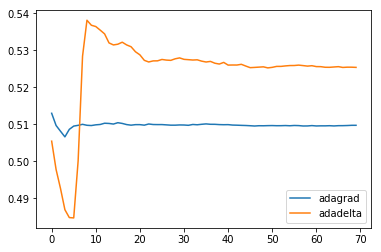

In [41]:
x = np.arange(len(adagrad_auc))
plt.plot(x, np.array(adagrad_auc))
plt.plot(x, np.array(adadelta_auc))
plt.legend(['adagrad', 'adadelta'], loc='lower right')
plt.show()

In [43]:
alpha = 1e-6
epochs = 70

adagrad_model = LightFM(no_components=30,
                        loss='warp-kos',
                        learning_schedule='adagrad',
                        user_alpha=alpha, item_alpha=alpha)
adadelta_model = LightFM(no_components=30,
                        loss='warp-kos',
                        learning_schedule='adadelta',
                        user_alpha=alpha, item_alpha=alpha)

adagrad_auc = []

for epoch in range(epochs):
    adagrad_model.fit_partial(train, epochs=1)
    adagrad_auc.append(auc_score(adagrad_model, test).mean())


adadelta_auc = []

for epoch in range(epochs):
    adadelta_model.fit_partial(train, epochs=1)
    adadelta_auc.append(auc_score(adadelta_model, test).mean())

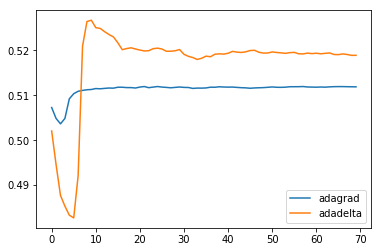

In [44]:
x = np.arange(len(adagrad_auc))
plt.plot(x, np.array(adagrad_auc))
plt.plot(x, np.array(adadelta_auc))
plt.legend(['adagrad', 'adadelta'], loc='lower right')
plt.show()